<a href="https://colab.research.google.com/github/SaydobidXusanov/Multimedia-Computing/blob/main/MC_Sharpness_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
# Read the image
image = cv2.imread('landscape.jpg')

In [3]:
# Resize the image for display (e.g., 50% of the original size)
scale_percent = 10  # Percent of the original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)

## Image Sharpness

In [4]:
# Create a sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5,-1],
                              [0, -1, 0]])

In [33]:
# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (25, 25), 0)
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB) # Convert image to RGB

# Sharpen the image
sharpened_image = cv2.filter2D(blurred_image, -1, sharpening_kernel)
sharpened_image_rgb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)  # Convert sharpened image to RGB

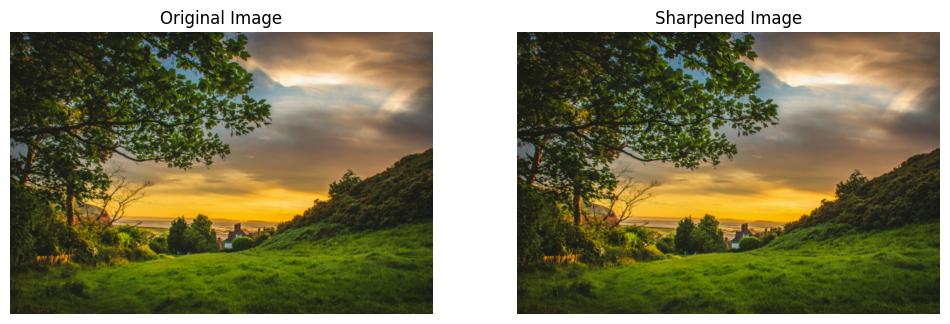

In [34]:
# Display original and sharpened images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(blurred_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image_rgb)
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

## Detect Image Edges

In [7]:
# Convert image to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

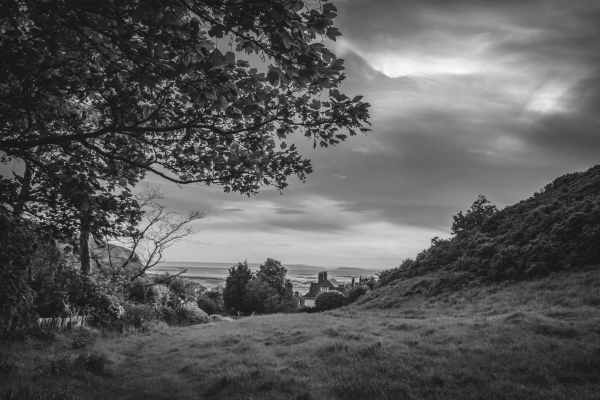

In [8]:
# Resize the image
resized_gray_img = cv2.resize(gray_img, dim, interpolation=cv2.INTER_AREA)

# Show the result
cv2_imshow(resized_gray_img)

In [14]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray_img, (5, 5), 0)

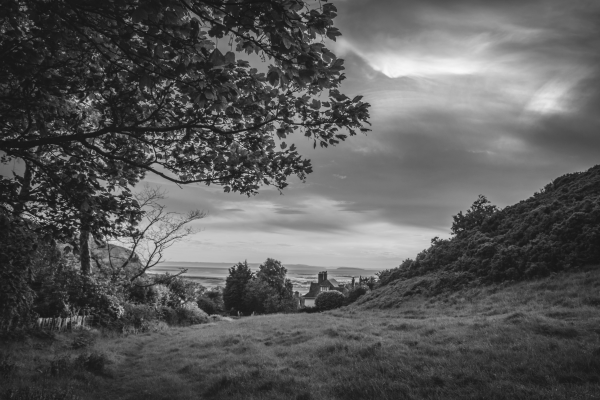

In [15]:
# Resize the image
resized_blurred = cv2.resize(blurred, dim, interpolation=cv2.INTER_AREA)

# Show the result
cv2_imshow(resized_blurred)

In [16]:
# Perform Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

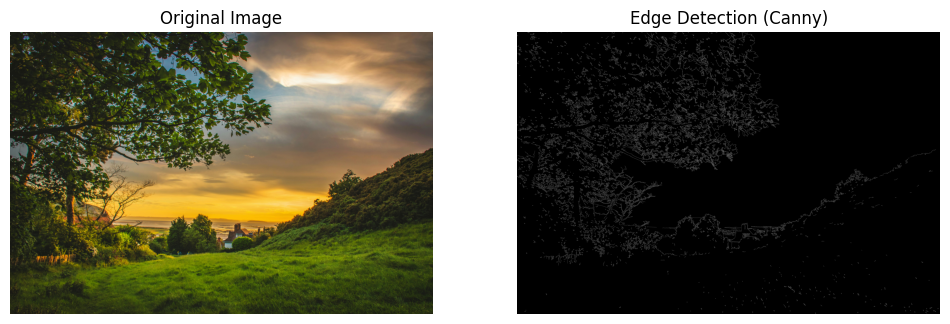

In [17]:
# Convert BGR to RGB for displaying original image with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display original and edge-detected images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')

plt.show()